In [1]:
    from scapy.all import *
    import pandas as pd
    import matplotlib.pyplot as plt

    # 1. Capturar 10 paquetes y guardarlos en un archivo pcap
    packets = sniff(count=10)
    wrpcap('captura.pcap', packets)

    # Imprimir tipo de datos, longitud y contenido del archivo pcap
    pcap = rdpcap('captura.pcap')
    print('Tipo de datos:', type(pcap))
    print('Longitud:', len(pcap))
    print('Contenido:', pcap.show())

    # 2. Agregar el archivo analisis_paquetes.pcap a la captura anterior
    packets2 = rdpcap('analisis_paquetes.pcap')
    pcap.extend(packets2)
    wrpcap('captura.pcap', pcap)

    # 3. Convertir el pcap a un DataFrame
    data = {'Src Address': [], 'Dst Address': [], 'Src Port': [], 'Dst Port': [], 'Payload': [],'Payload_Raw':[]}
    for pkt in pcap:
        try:
            src = pkt['IP'].src
            dst = pkt['IP'].dst
            sport = pkt['TCP'].sport
            dport = pkt['TCP'].dport
            payload = pkt['Raw'].load
            
        except:
            continue
        data['Src Address'].append(src)
        data['Dst Address'].append(dst)
        data['Src Port'].append(sport)
        data['Dst Port'].append(dport)
        data['Payload'].append(len(payload))
        data['Payload_Raw'].append(payload)
    df = pd.DataFrame(data)


# 4. Mostrar los valores de las columnas solicitadas
df






Tipo de datos: <class 'scapy.plist.PacketList'>
Longitud: 10
0000 Ether / IP / TCP 162.159.130.234:https > 192.168.0.5:49766 PA / Raw
0001 Ether / IP / TCP 162.159.130.234:https > 192.168.0.5:49766 PA / Raw
0002 Ether / IP / TCP 192.168.0.5:49766 > 162.159.130.234:https A
0003 Ether / IP / TCP 157.240.233.60:https > 192.168.0.5:51214 PA / Raw
0004 Ether / IP / TCP 192.168.0.5:51214 > 157.240.233.60:https PA / Raw
0005 Ether / IP / TCP 157.240.233.60:https > 192.168.0.5:51214 A / Padding
0006 Ether / IP / TCP 192.168.0.5:49926 > 192.168.0.4:8009 PA / Raw
0007 Ether / IP / TCP 192.168.0.4:8009 > 192.168.0.5:49926 PA / Raw
0008 Ether / IP / TCP 192.168.0.5:49926 > 192.168.0.4:8009 A
0009 Ether / ARP who has 192.168.0.5 says 192.168.0.1 / Padding
Contenido: None


,Src Address,Dst Address,Src Port,Dst Port,Payload,Payload_Raw
0,162.159.130.234,192.168.0.5,443,49766,98,b'\x17\x03\x03\x00]\x8a\xee\xb6L\xd6\x89)\xf5\...
1,162.159.130.234,192.168.0.5,443,49766,408,b'\x17\x03\x03\x01\x935\xe2\xb2\x17\x00\x8c\xc...
2,157.240.233.60,192.168.0.5,443,51214,95,b'\x17\x03\x03\x00Ze\xc5\xa8\x00\x85\x88\x1f3 ...
3,192.168.0.5,157.240.233.60,51214,443,74,b'\x17\x03\x03\x00E\xac2\x95\xa8^\xe68\xb5\xe4...
4,192.168.0.5,192.168.0.4,49926,8009,110,b'\x17\x03\x03\x00i\xf5H\x0f\'.\xb4`G\x81\x18\...
5,192.168.0.4,192.168.0.5,8009,49926,110,"b""\x17\x03\x03\x00i\x15u\xcb\x80\x99\xe9\x01xk..."


In [2]:
# 5. Estadísticas
print('IP origen más frecuente:', df['Src Address'].mode()[0])
print('IP destino más frecuente:', df['Dst Address'].mode()[0])
ip_a = df['Src Address'].mode()[0]
print('IPs a las que se comunica la IP del inciso a:', df[df['Src Address']==ip_a]['Dst Address'].unique())
print('Puertos destino a los que se comunica la IP del inciso a:', df[df['Src Address']==ip_a]['Dst Port'].unique())
ip_b = df['Dst Address'].mode()[0]
print('Puertos origen a los que se comunica la IP del inciso b:', df[df['Dst Address']==ip_b]['Src Port'].unique())
ports_d = df['Dst Port'].value_counts().head(2).index.to_list()
print('Propósito de los puertos que más aparecen en los incisos d:', ports_d)
ports_e = df['Src Port'].value_counts().head(2).index.to_list()
print('Propósito de los puertos que más aparecen en los incisos e:', ports_e)


IP origen más frecuente: 162.159.130.234
IP destino más frecuente: 192.168.0.5
IPs a las que se comunica la IP del inciso a: ['192.168.0.5']
Puertos destino a los que se comunica la IP del inciso a: [49766]
Puertos origen a los que se comunica la IP del inciso b: [ 443 8009]
Propósito de los puertos que más aparecen en los incisos d: [49766, 51214]
Propósito de los puertos que más aparecen en los incisos e: [443, 51214]


los puertos que pas aparecen son el 443 que es el puerto para https, un protocolo comun en el intercambio de paquetes y el puerto 80 que es para el protocolo http

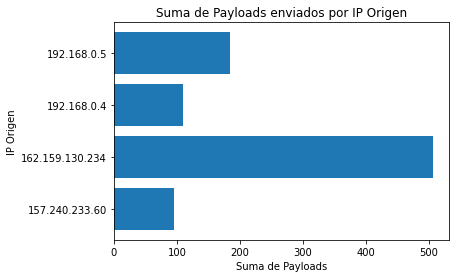

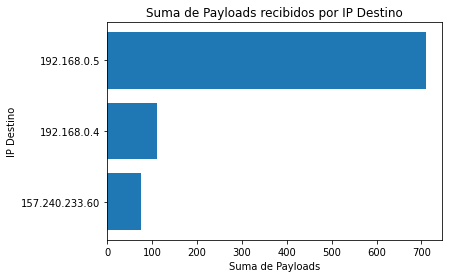

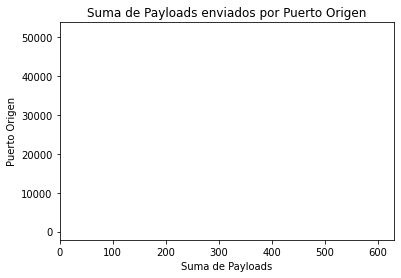

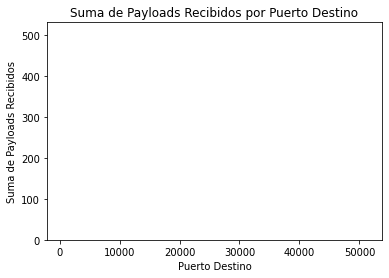

In [3]:

# Gráfico a
src_payloads = df.groupby('Src Address')['Payload'].sum().reset_index(name='Payload')
plt.barh(src_payloads['Src Address'], src_payloads['Payload'])
plt.xlabel('Suma de Payloads')
plt.ylabel('IP Origen')
plt.title('Suma de Payloads enviados por IP Origen')
plt.show()

# Gráfico b
dst_payloads = df.groupby('Dst Address')['Payload'].sum().reset_index(name='Payload')
plt.barh(dst_payloads['Dst Address'], dst_payloads['Payload'])
plt.xlabel('Suma de Payloads')
plt.ylabel('IP Destino')
plt.title('Suma de Payloads recibidos por IP Destino')
plt.show()

# Gráfico c
src_port_payloads = df.groupby('Src Port')['Payload'].sum().reset_index(name='Payload')
plt.barh(src_port_payloads['Src Port'], src_port_payloads['Payload'])
plt.xlabel('Suma de Payloads')
plt.ylabel('Puerto Origen')
plt.title('Suma de Payloads enviados por Puerto Origen')
plt.show()

# Suma de payloads recibidos por puerto destino
dst_payloads = df.groupby('Dst Port')['Payload'].sum().reset_index(name='Payload')

# Grafica d
plt.bar(dst_payloads['Dst Port'], dst_payloads['Payload'])
plt.xlabel('Puerto Destino')
plt.ylabel('Suma de Payloads Recibidos')
plt.title('Suma de Payloads Recibidos por Puerto Destino')
plt.show()


In [4]:
most_common_src = df['Src Address'].value_counts().index[0]
new_df = df[df['Src Address'] == most_common_src]
new_df


,Src Address,Dst Address,Src Port,Dst Port,Payload,Payload_Raw
0,162.159.130.234,192.168.0.5,443,49766,98,b'\x17\x03\x03\x00]\x8a\xee\xb6L\xd6\x89)\xf5\...
1,162.159.130.234,192.168.0.5,443,49766,408,b'\x17\x03\x03\x01\x935\xe2\xb2\x17\x00\x8c\xc...


In [5]:
payloads_df = df.groupby(['Src Address', 'Dst Address'])['Payload'].sum().reset_index()
payloads_df

,Src Address,Dst Address,Payload
0,157.240.233.60,192.168.0.5,95
1,162.159.130.234,192.168.0.5,506
2,192.168.0.4,192.168.0.5,110
3,192.168.0.5,157.240.233.60,74
4,192.168.0.5,192.168.0.4,110


In [6]:
most_common_dst = payloads_df[payloads_df['Src Address'] == most_common_src].sort_values(by='Payload', ascending=False)['Dst Address'].iloc[0]
print('La dirección IP que más ha intercambiado bytes con la IP origen más frecuente es:', most_common_dst)


La dirección IP que más ha intercambiado bytes con la IP origen más frecuente es: 192.168.0.5


In [7]:
# Crear nuevo DataFrame con la conversación entre las IPs más frecuente y sospechosa
ip_mas_frecuente = df['Src Address'].value_counts().index[0]
df_frecuente = df[df['Src Address'] == ip_mas_frecuente]

ip_sospechosa = df_frecuente.groupby('Dst Address')['Payload'].sum().sort_values(ascending=False).index[0]
new_df2 = df[df['Src Address'].isin([ip_mas_frecuente, ip_sospechosa]) & df['Dst Address'].isin([ip_mas_frecuente, ip_sospechosa])]
new_df2

,Src Address,Dst Address,Src Port,Dst Port,Payload,Payload_Raw
0,162.159.130.234,192.168.0.5,443,49766,98,b'\x17\x03\x03\x00]\x8a\xee\xb6L\xd6\x89)\xf5\...
1,162.159.130.234,192.168.0.5,443,49766,408,b'\x17\x03\x03\x01\x935\xe2\xb2\x17\x00\x8c\xc...


In [8]:
payloads = []
for p in df['Payload_Raw'].values:
    payloads.append(p)
payloads

[b'\x17\x03\x03\x00]\x8a\xee\xb6L\xd6\x89)\xf5\xfd\x007\xe3PCev\xa7"\xf6]\xabx\xd2\xab&t\xdb\xf7\xa4\x1f\xdf\xaa\x8a\xd7z\xcfx\xd3o\x98\x87X\x93,\x14\x88lX\x1f\xa89\xef@\xab\x8b\x14"\xb8\xe4\x91\xb7\x90\x15\xd1"\x133\xc2\xe3\xba\xbf\x15\x88;&\xd2\xa8\x9f\xdb\x8d\x0c"\xe14\xb7\xca\x80\x90\x1c?\xc0F\xb4',
 b'\x17\x03\x03\x01\x935\xe2\xb2\x17\x00\x8c\xc7\xd0\x03\xc5"e\x07\x9a\\R\xa1e\x9a\xd3\x86\xf0\xd0\xa4\x83\x88\xdd\x9bo\x9f\x99\x8a\xaf\xd2*\x1a\x88f\x17\xf0\xb6\x83mJ]\xd8\xbb\xb9\x94\xf0\x0c\xcb\x82\x0fS<\'\xe0\x8d\xd0\xe5F\x90\x9ef\x18\t\xbd\xe4\x90\x94\xba\x96\xda#\x98*\xdb\x92M\xe2\x80k\xc4\xe1WH\xc1RO\x98/\x83\xdb{/Ef\xecU_\xf1\xb2sd\xf2\x1f\xb5\xce=\xeeaq\xc2\x114\x1aj\xf2\xc1\xda\xf9W\xb2Z\r\x15T\xe9\xa5`c\xb1\xd2\x9bb\x95\xec\x89\xc2Fs\xdd\xc0\xddkY\xdc\x8bX\xd1`\x00>\xa2\xe0=\xf0\xa7W\x9be\xfb\x1cE\xe1\x7f\x97\x8a\xa6\xa7Y\xdby;\x1e\xb8\xe2\xd5\x9cQu\x98<8\x14\x83t\xd0b\xd6\xa42\x91\xaf\xec\x0b\xb5\xa8\x94\xf7\xf7XC\xd4.\xc3\xb2\x04\xc4*\xdb\x18\x06\x9d\xe6{\x9c\x82\xe3[\x84\x